In [ ]:
import os 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

In [ ]:
datagen_train = ImageDataGenerator(
    rescale=1. /255,
    rotation_range=30,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest'
)

datagen_test_1 = ImageDataGenerator(
    rescale=1. /255,
)

data_gen_train = datagen_train.flow_from_directory(
    '/content/DataSet/train', 
    target_size=(48,48),
    batch_size=32,
    shuffle=True, 
    color_mode='grayscale',
    class_mode='categorical'
  )

data_gen_test = datagen_test_1.flow_from_directory(
    '/content/DataSet/test',
    target_size=(48,48), 
    batch_size=32, 
    shuffle=True, 
    color_mode='grayscale',
    class_mode='categorical'
  )

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(48,48,1)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    tf.keras.layers.Dropout(0.5),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(7, activation='softmax'),
])

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(data_gen_train, epochs=100, validation_data=data_gen_test)

Epoch 1/100
449/449 [==============================] - 24s 52ms/step - loss: 1.8840 - accuracy: 0.2565 - val_loss: 1.7938 - val_accuracy: 0.2343
Epoch 2/100
449/449 [==============================] - 24s 52ms/step - loss: 1.7292 - accuracy: 0.3035 - val_loss: 1.7584 - val_accuracy: 0.2634
Epoch 3/100
449/449 [==============================] - 23s 51ms/step - loss: 1.6693 - accuracy: 0.3370 - val_loss: 1.5548 - val_accuracy: 0.3870
Epoch 4/100
449/449 [==============================] - 23s 51ms/step - loss: 1.6202 - accuracy: 0.3634 - val_loss: 1.4655 - val_accuracy: 0.4221
Epoch 5/100
449/449 [==============================] - 24s 53ms/step - loss: 1.5801 - accuracy: 0.3845 - val_loss: 1.4616 - val_accuracy: 0.4348
Epoch 6/100
449/449 [==============================] - 23s 51ms/step - loss: 1.5460 - accuracy: 0.3956 - val_loss: 1.4173 - val_accuracy: 0.4621
Epoch 7/100
449/449 [==============================] - 23s 52ms/step - loss: 1.5135 - accuracy: 0.4118 - val_loss: 1.5258 - val_ac

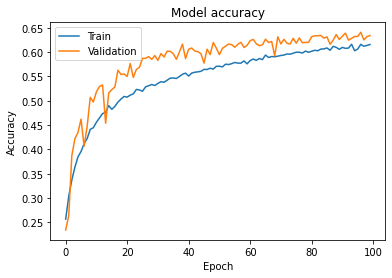

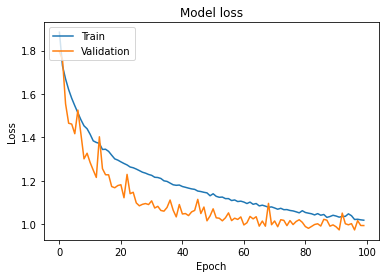

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
model_json = model.to_json()
with open("emotion_model.json", "w") as json_file:
    json_file.write(model_json)

In [ ]:
model.save_weights('emotion_model.h5')